# Problem Definition

- This is a personal project and is intended for learning purpose;
- This data science project is aimed to build a model that can accurately predicts whether the air is of good quality in a region with certain parameters such as Temperature, humidity, PM etc..., and that is to assess the quality air in the area and take considerable actions when the air quality is concerning;


# Data Collection

This dataset focuses on air quality assessment across various regions. The dataset contains 5000 samples and captures critical environmental and demographic factors that influence pollution levels.

Key Features:
- Temperature (°C): Average temperature of the region.  
- Humidity (%): Relative humidity recorded in the region.  
- PM2.5 Concentration (µg/m³): Fine particulate matter levels.  
- PM10 Concentration (µg/m³): Coarse particulate matter levels.  
- NO2 Concentration (ppb): Nitrogen dioxide levels.  
- SO2 Concentration (ppb): Sulfur dioxide levels.  
- CO Concentration (ppm): Carbon monoxide levels.  
- Proximity to Industrial Areas (km): Distance to the nearest industrial zone.  
- Population Density (people/km²): Number of people per square kilometer in the region.

### Target Variable: Air Quality Levels  
- **Good:** Clean air with low pollution levels.  
- **Moderate:** Acceptable air quality but with some pollutants present.  
- **Poor:** Noticeable pollution that may cause health issues for sensitive groups.  
- **Hazardous:** Highly polluted air posing serious health risks to the population.


In [3]:
import pandas as pd

df = pd.read_csv("updated_pollution_dataset.csv")

In [4]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [6]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


# Data Cleaning & Preprocessing and EDA

Encoding categorical data, air quality column using LabelEncoder

In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoder_data = encoder.fit_transform(df["Air Quality"])

df["Integer Encoded Categories"] = encoder_data

In [8]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality,Integer Encoded Categories
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good,0


In [9]:
dummy_data = pd.get_dummies(df["Air Quality"], dtype=int)

df = pd.concat([df,  dummy_data], axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
 10  Integer Encoded Categories     5000 non-null   int64  
 11  Good                           5000 non-null   int64  
 12  Hazardous                      5000 non-null   i

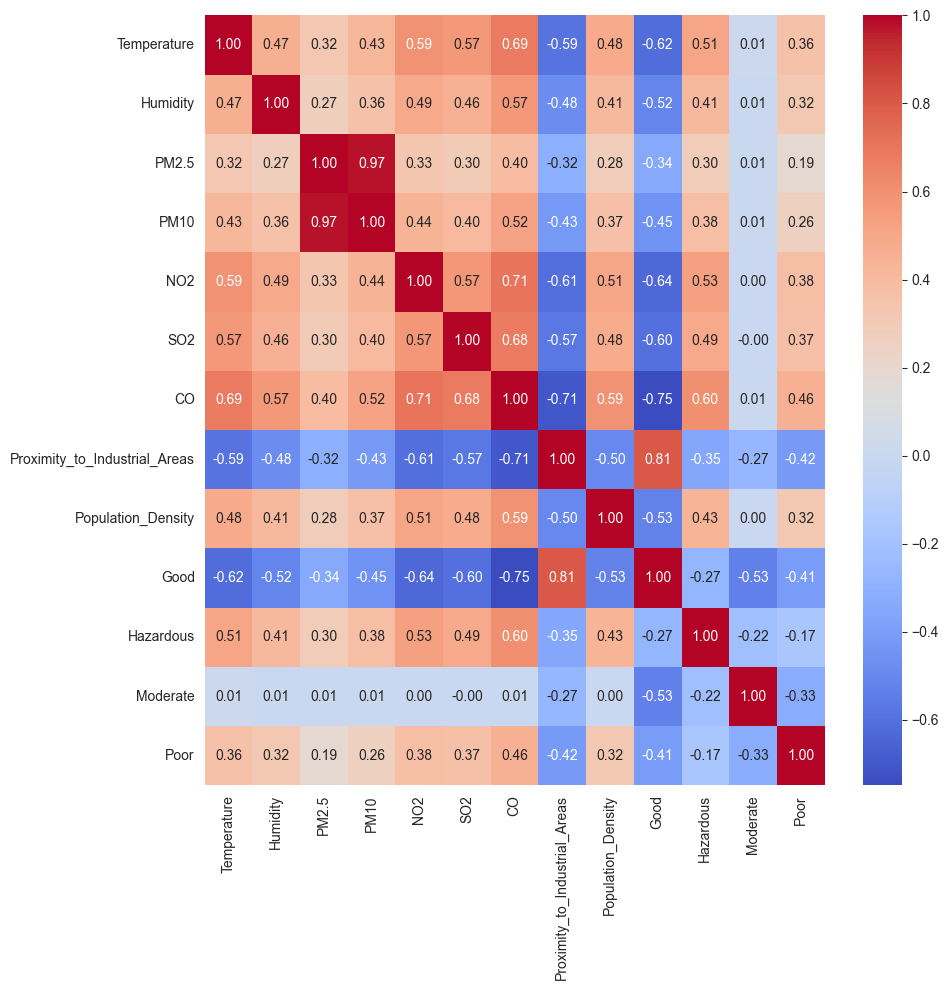

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_mar = df.drop(columns=["Air Quality", "Integer Encoded Categories"]).corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_mar, annot=True, cmap="coolwarm", fmt='.2f')
plt.show()

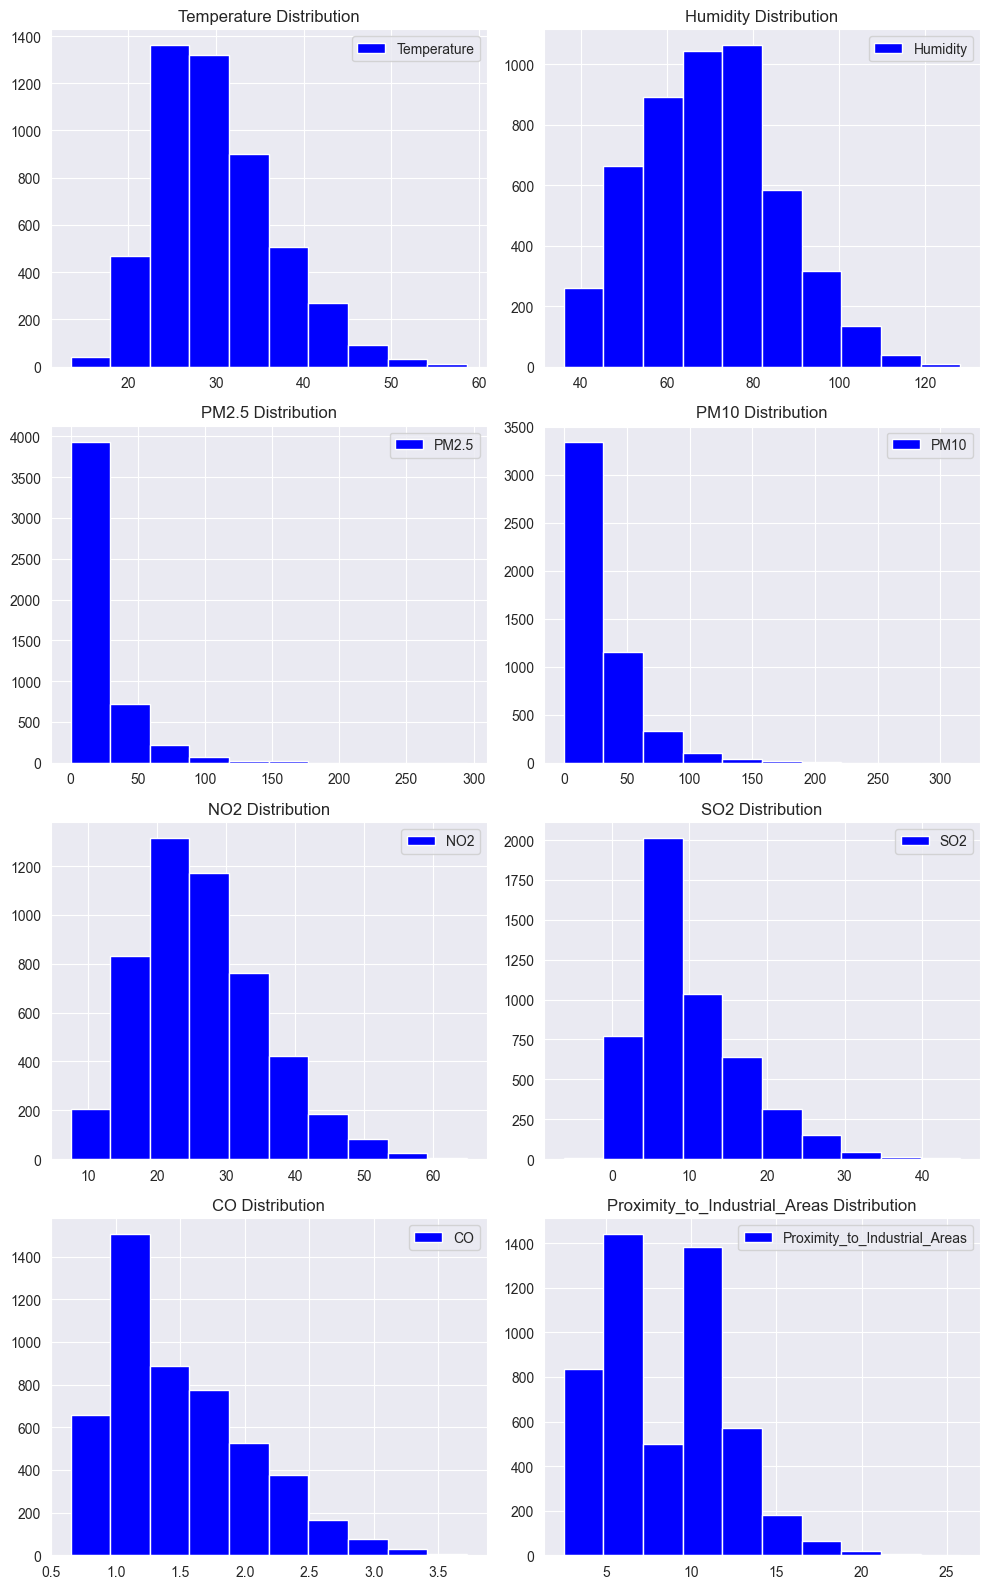

In [12]:
fig, ax = plt.subplots(4, 2, figsize=(10,16))


for i in range(8):
    ax[i//2, i%2].hist(bins=10, color="blue", x=df.iloc[:,i], label=df.iloc[:,i].name)
    ax[i//2, i%2].set_title(str(df.iloc[:,i].name) + " Distribution")
    ax[i//2, i%2].legend()


plt.tight_layout()        
plt.show()        
        
        

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
 10  Integer Encoded Categories     5000 non-null   int64  
 11  Good                           5000 non-null   int64  
 12  Hazardous                      5000 non-null   i

In [14]:
from imblearn.over_sampling import SMOTE

df.sample(frac=1, random_state=42)

smote = SMOTE(sampling_strategy='auto', random_state=42)


X_res, y_res = smote.fit_resample(df.drop(columns=["Air Quality", "Integer Encoded Categories", "Good", "Hazardous", "Moderate", "Poor"]), df["Integer Encoded Categories"])

X_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    8000 non-null   float64
 1   Humidity                       8000 non-null   float64
 2   PM2.5                          8000 non-null   float64
 3   PM10                           8000 non-null   float64
 4   NO2                            8000 non-null   float64
 5   SO2                            8000 non-null   float64
 6   CO                             8000 non-null   float64
 7   Proximity_to_Industrial_Areas  8000 non-null   float64
 8   Population_Density             8000 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 562.6 KB


In [15]:
y_res.value_counts()

Integer Encoded Categories
2    2000
0    2000
1    2000
3    2000
Name: count, dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res, y_res)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_res, test_size=0.2, random_state=0)

In [17]:
X_train[:5]

array([[-0.89059476,  0.54877171,  0.29223661, -0.01449977, -0.65982993,
        -1.30803643, -1.53218109,  3.46285734, -1.47411784],
       [ 0.09292928,  0.0893819 , -0.06130951, -0.00951146,  0.08601466,
         0.26771753,  0.69605075, -0.58793257,  0.97224547],
       [ 1.10221607,  0.14891429, -0.21394839,  0.00384541,  0.63852669,
         2.17301305,  0.79758935, -0.09678389,  0.04709793],
       [-0.98647808, -0.42765804, -0.1092196 , -0.02789888, -0.63370041,
        -0.27719238,  0.30973549, -0.41071588, -0.78491396],
       [-1.1900968 , -0.39769274, -0.58802896, -0.66626453, -0.52832804,
         0.26908835, -0.26247546, -0.53838795, -0.57380647]])

# Model Selection & Training

Using GridSearchCV greatly facilitates the Cross Validation phase by running a single run with different params for the estimator and giving the best estimator according to the scoring metric used which is default to auto

In [18]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

clf = tree.DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=clf, param_grid = {
    "criterion": ["gini", "entropy"],  # Function to measure the quality of a split
    "max_depth": [ 40],  # Maximum depth of the tree
    "min_samples_split": [5],  # Minimum samples required to split an internal node
    "min_samples_leaf": [1, 2, 4, 6],  # Minimum samples required to be at a leaf node
    "max_features": ["sqrt"],  # Number of features to consider at each split
    "max_leaf_nodes": [ 50],  # Maximum number of leaf nodes
    "ccp_alpha": [0.0, 0.01, 0.1],  # Complexity parameter for cost-complexity pruning
}
)

grid_search.fit(X=X_train, y=y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.01, 0.1],
                         'criterion': ['gini', 'entropy'], 'max_depth': [40],
                         'max_features': ['sqrt'], 'max_leaf_nodes': [50],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [5]})

[Text(0.6407563025210085, 0.9583333333333334, 'x[7] <= 0.798\ngini = 0.75\nsamples = 6400\nvalue = [1588.0, 1593.0, 1613.0, 1606.0]'),
 Text(0.3739495798319328, 0.875, 'x[6] <= 0.053\ngini = 0.667\nsamples = 4636\nvalue = [0.0, 1568.0, 1505.0, 1563.0]'),
 Text(0.5073529411764706, 0.9166666666666667, 'True  '),
 Text(0.18907563025210083, 0.7916666666666666, 'x[4] <= 0.639\ngini = 0.306\nsamples = 1724\nvalue = [0, 13, 1402, 309]'),
 Text(0.12605042016806722, 0.7083333333333334, 'x[0] <= 0.543\ngini = 0.231\nsamples = 1586\nvalue = [0.0, 5.0, 1376.0, 205.0]'),
 Text(0.08403361344537816, 0.625, 'x[1] <= 1.178\ngini = 0.167\nsamples = 1442\nvalue = [0, 2, 1310, 130]'),
 Text(0.06722689075630252, 0.5416666666666666, 'x[8] <= 0.926\ngini = 0.138\nsamples = 1409\nvalue = [0, 0, 1304, 105]'),
 Text(0.03361344537815126, 0.4583333333333333, 'x[7] <= -0.65\ngini = 0.117\nsamples = 1368\nvalue = [0, 0, 1283, 85]'),
 Text(0.01680672268907563, 0.375, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 0, 43]'

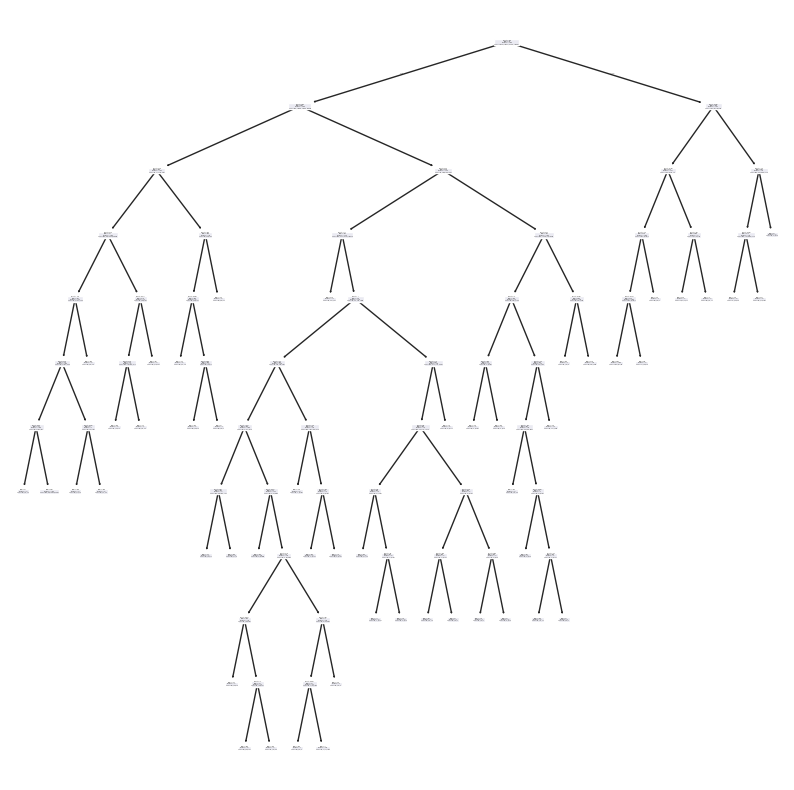

In [19]:
best_clf = grid_search.best_estimator_
plt.figure(figsize=(10, 10))
tree.plot_tree(best_clf)

In [20]:
y_pred_1 = best_clf.predict(X_test)

In [21]:
from sklearn.metrics import classification_report

classification_results = classification_report(y_true=y_test, y_pred=y_pred_1)
print(classification_results)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       412
           1       0.89      0.85      0.87       407
           2       0.92      0.89      0.91       387
           3       0.77      0.84      0.80       394

    accuracy                           0.89      1600
   macro avg       0.89      0.89      0.89      1600
weighted avg       0.89      0.89      0.89      1600



### Fine-Tuning a High-Bias Decision Tree Model

Fine-tuning a **high-bias Decision Tree model** involves adjusting the model to reduce underfitting and allow it to capture more complex patterns in the data. High bias typically occurs when the model is too simple, and underfitting means it cannot learn the underlying patterns in the data. Here’s how you can address high bias in a Decision Tree model:

#### 1. Increase Model Complexity
High-bias models can be underfitted when they are too shallow. To increase complexity, modify the following hyperparameters:

##### Key Hyperparameters to Adjust:
- **`max_depth`**: Increase the depth of the tree to allow it to learn more detailed patterns in the data.
- **`min_samples_split`**: Decrease the minimum number of samples required to split an internal node.
- **`min_samples_leaf`**: Lower the minimum number of samples required to be at a leaf node.
- **`max_features`**: Increase the number of features considered when splitting a node.
- **`max_leaf_nodes`**: Increase the number of leaf nodes to allow more fine-grained decision-making.


In [22]:
print(f"Previous best model: {grid_search.best_estimator_}")

Previous best model: DecisionTreeClassifier(max_depth=40, max_features='sqrt', max_leaf_nodes=50,
                       min_samples_leaf=4, min_samples_split=5)


In [23]:
grid_search_2 = GridSearchCV(estimator=clf, param_grid = {
    "criterion": ["gini", "entropy"],  # Function to measure the quality of a split
    "max_depth": [100],  # Maximum depth of the tree
    "min_samples_split": [4, 5, 7],  # Minimum samples required to split an internal node
    "min_samples_leaf": [1, 2,3, 4],  # Minimum samples required to be at a leaf node
    "max_features": ["sqrt", None],  # Number of features to consider at each split
    "max_leaf_nodes": [90],  # Maximum number of leaf nodes
    "ccp_alpha": [ 0.01],  # Complexity parameter for cost-complexity pruning
}
)

grid_search_2.fit(X=X_train, y=y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.01], 'criterion': ['gini', 'entropy'],
                         'max_depth': [100], 'max_features': ['sqrt', None],
                         'max_leaf_nodes': [90],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [4, 5, 7]})

In [24]:
list(encoder.classes_)

['Good', 'Hazardous', 'Moderate', 'Poor']

In [25]:
best_clf_v2 = grid_search_2.best_estimator_

y_pred_2 = best_clf_v2.predict(X_test)

y_pred_2_str = encoder.inverse_transform(y_pred_2)
y_test_str = encoder.inverse_transform(y_test)
print(classification_results_2 := classification_report(y_test_str, y_pred_2_str))

              precision    recall  f1-score   support

        Good       1.00      0.99      0.99       412
   Hazardous       0.87      0.78      0.82       407
    Moderate       0.88      0.95      0.92       387
        Poor       0.74      0.77      0.75       394

    accuracy                           0.87      1600
   macro avg       0.87      0.87      0.87      1600
weighted avg       0.87      0.87      0.87      1600



**Confusion Matrix**

Confusion Matrix:
[[409   0   3   0]
 [  0 316   0  91]
 [  2   0 369  16]
 [  0  47  45 302]]


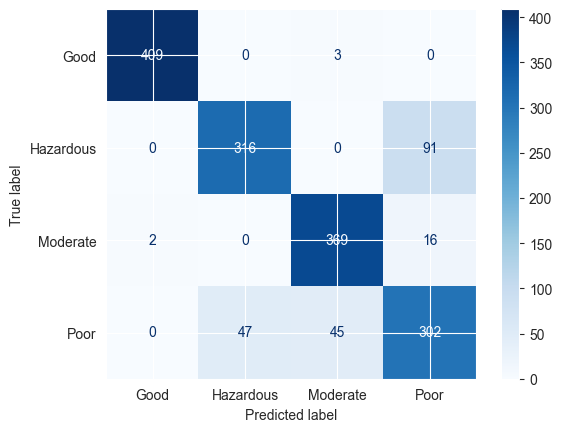

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true=y_test_str, y_pred=y_pred_2_str, labels=encoder.classes_)

print(f"Confusion Matrix:\n{cm}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(cmap='Blues')

In [27]:
df_true = encoder.inverse_transform(y_test)
df_pred = encoder.inverse_transform(y_pred_2)

y_pred_vs_true = {
    "True categories": df_true,
    "Predicted categories": df_pred,
}

y_pred_vs_true = pd.DataFrame(y_pred_vs_true)

y_pred_vs_true.head(20)

,True categories,Predicted categories
0,Moderate,Moderate
1,Moderate,Moderate
2,Hazardous,Hazardous
3,Moderate,Moderate
4,Moderate,Moderate
5,Moderate,Moderate
6,Hazardous,Hazardous
7,Poor,Poor
8,Hazardous,Hazardous
9,Poor,Poor


# Model Evaluation
When evaluating this model, it's evident that its performance is quite reasonable, especially considering the nature of the four labels (e.g., good, moderate, poor, and hazardous). The proximity between labels makes certain prediction errors tolerable. For instance:

Predicting "poor" when the actual label is "hazardous" may not be critical, as both conditions necessitate similar cautionary measures.
Similarly, confusing "good" with "moderate" is less concerning, as neither represents a serious threat.
This tolerance arises because the categorical boundaries between these labels are often subjective or based on thresholds, and misclassification between adjacent categories does not significantly affect the practical implications.

In [34]:
# from sklearn.neighbors import KNeighborsClassifier
# 
# kn_clf = KNeighborsClassifier()
# 
# grid_search_2 = GridSearchCV(
#     estimator=kn_clf,
#     verbose=True,
#     param_grid={
#         "n_jobs": [-1],
#         "n_neighbors": [10,20,21,25,27,30,35,40,45, 50, 100, 250, 500],
#         "algorithm": ["ball_tree", "kd_tree"],
#         "weights": ["uniform"],
#     }
# )
# 
# grid_search_2.fit(X=X_train, y=)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


C:\Users\abdss\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree'], 'n_jobs': [-1],
                         'n_neighbors': [10, 20, 21, 25, 27, 30, 35, 40, 45, 50,
                                         100, 250, 500],
                         'weights': ['uniform']},
             verbose=True)

In [35]:
# best_kn_clf = grid_search_2.best_estimator_
# y_pred_2 = best_kn_clf.predict(X_train)
# 
# classification_results_2 = classification_report(Y_train, y_pred_2)
# print(classification_results_2)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1596
           1       0.94      0.71      0.81       400
           2       0.92      0.96      0.94      1200
           3       0.84      0.84      0.84       804

   micro avg       0.93      0.93      0.93      4000
   macro avg       0.92      0.88      0.89      4000
weighted avg       0.93      0.93      0.93      4000
 samples avg       0.93      0.93      0.93      4000



C:\Users\abdss\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Failed again. Let's handle class imbalance

In [46]:
# best_kn_clf_ver2 = grid_search_3.best_estimator_
# 
# y_pred_2_v2 = best_kn_clf_ver2(X_test)
# 
# classification_results_2_v2 = classification_report()

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'